In [1]:
! gdown --id 1cyPBRKhHJODMCvrMbn6p2fz0G5LnyjQk

Downloading...
From: https://drive.google.com/uc?id=1cyPBRKhHJODMCvrMbn6p2fz0G5LnyjQk
To: /content/mp3_mfccs.pickle
100% 531k/531k [00:00<00:00, 35.7MB/s]


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [3]:
import pickle

with open('mp3_mfccs.pickle', 'rb') as handle:
    mp3 = pickle.load(handle)
mp3.keys()

features_df = pd.DataFrame(mp3['data'],  columns = mp3['feature_names'])
features_df

,chroma_stft,spectral_centroid,spectral_bandwidth,spectral_rolloff,rms,zero_crossing_rate,mfccs_0,mfccs_1,mfccs_2,mfccs_3,mfccs_4,mfccs_5,mfccs_6,mfccs_7,mfccs_8,mfccs_9,mfccs_10,mfccs_11,mfccs_12,mfccs_13,mfccs_14,mfccs_15,mfccs_16,mfccs_17,mfccs_18,mfccs_19
0,0.232363,2132.133009,1532.489571,3731.697431,0.097478,0.130573,-250.387039,89.646515,-91.178802,50.069607,-28.212360,-34.305183,-7.950161,-22.208513,-4.083499,5.081441,1.690262,2.378319,7.945852,-17.654047,-11.052958,-5.072163,-9.533834,10.697487,2.291705,11.466321
1,0.213282,2624.733518,2433.593693,5092.231277,0.214787,0.134984,-135.006882,53.321243,-14.403013,24.709724,-3.373373,5.470722,15.017687,5.644182,-15.074151,-9.942076,-2.333773,10.031199,7.041321,-1.048274,-12.877126,-2.939546,0.325550,8.132950,8.272929,-1.621517
2,0.176809,1176.588480,1382.560894,2295.233836,0.075069,0.048519,-323.462341,103.863014,-28.547918,2.336782,-15.711629,-26.558065,-19.175488,-13.545383,-25.065348,-5.336615,-1.205248,-11.806523,-2.758070,-9.673952,-23.239120,-22.414635,-10.796002,-7.055260,3.320124,7.657379
3,0.212348,865.807065,1181.532316,1443.995435,0.040507,0.043348,-363.698975,163.389160,-4.299915,19.220289,7.768054,5.167816,-0.687273,-7.874590,-11.842854,-6.150419,-9.306446,-7.254827,-2.011633,-3.091455,-8.705821,-6.218644,-8.712393,-8.130782,-4.965748,-0.939671
4,0.183405,2087.511205,2038.600576,3920.713792,0.039878,0.087549,-329.440063,72.476448,-30.903608,0.737209,-17.626469,-17.902195,8.126000,3.432436,-15.020200,-0.768321,-3.890921,-2.084789,0.640166,-13.571609,-13.336144,-10.567654,-10.775214,-0.514912,-0.637745,4.761439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,0.183286,1977.989313,1739.022647,3555.928498,0.082667,0.148532,-231.741821,108.667244,-19.590322,8.863906,-13.836814,-0.323934,-1.091595,6.422812,-17.379215,-11.926119,-11.885379,-6.604269,9.109984,2.711586,-9.481259,-12.687554,-6.372543,-3.928871,-16.928770,-2.491690
1182,0.254509,1404.947925,1277.927713,2664.079724,0.088044,0.074725,-237.000076,144.870346,-67.224640,20.541727,-11.390965,-22.120573,-0.059789,-30.073996,-21.944016,-8.009840,-16.322369,1.727730,-3.672981,-6.765654,3.013274,5.636314,2.981302,8.481616,8.918760,7.599905
1183,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1131.370850,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1184,0.272045,1916.925840,2081.833525,3771.060530,0.122575,0.106381,-146.260574,114.991837,-15.123573,19.524017,0.447318,1.707911,-1.342782,3.035714,-6.760455,-0.148948,-6.741517,-4.262601,-7.079212,0.900651,-2.393778,1.509853,-2.564954,-4.075047,-7.201720,5.086911


In [8]:
X, y = np.array(features_df),np.array(mp3['target'])
X.shape

(1186, 26)

In [102]:
pca_lda = "PCA"

if pca_lda == "LDA":
    lda = LinearDiscriminantAnalysis(n_components=3)
    components = lda.fit(X, y).transform(X)
    components.shape
elif pca_lda == "PCA":
    pca = PCA(n_components=3)
    components = pca.fit(X, y).transform(X)
    components.shape

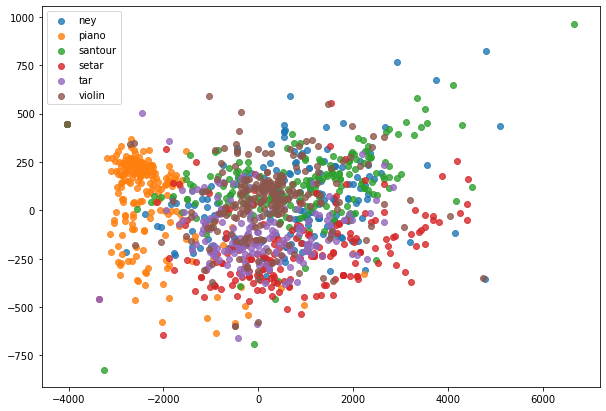

In [103]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot()
for key, value in enumerate(mp3["target_names"]):
    pca_lda_class = []
    for i in range(len(components)):
        if y[i] == key:
            pca_lda_class.append(components[i])
    pca_lda_class = np.array(pca_lda_class)
    ax.scatter(pca_lda_class[:, 0], pca_lda_class[:, 1], alpha=0.8, label=value)
ax.legend()
plt.savefig(f"{pca_lda}_2D.pdf")
plt.show()

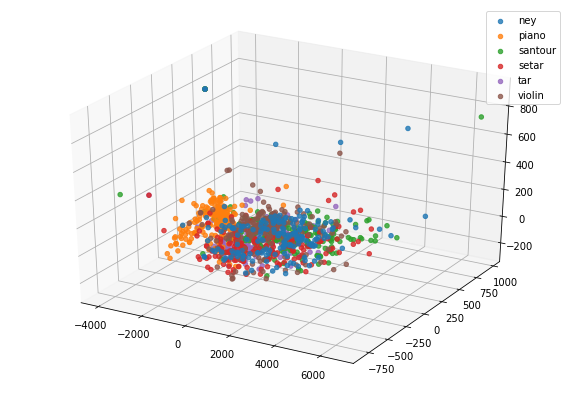

In [104]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(projection='3d')
for key, value in enumerate(mp3["target_names"]):
    pca_lda_class = []
    for i in range(len(components)):
        if y[i] == key:
            pca_lda_class.append(components[i])
    pca_lda_class = np.array(pca_lda_class)
    ax.scatter(pca_lda_class[:, 0], pca_lda_class[:, 1], pca_lda_class[:, 2], alpha=0.8, label=value)
ax.view_init(elev=30., azim=-60)
ax.legend()
plt.savefig(f"{pca_lda}_3D.pdf")
plt.show()